In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
#from sklearn import cross_validation, ensemble, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier   ##分類
#from sklearn.ensemble import RandomForestRegressor    ##回歸
#from sklearn.metrics import roc_auc_score
#還是要固定訓練資料和測試資料筆數
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer

In [3]:
dataset_num = 1

In [4]:
#all_no_miss
train_ori = pd.read_csv('0410RF_train_data_'+str(dataset_num)+'.csv')
test = pd.read_csv('0410RF_test_data_'+str(dataset_num)+'.csv')
combine = pd.concat([train_ori, test] , ignore_index=True)

In [5]:
combine = pd.get_dummies(data = combine , columns=["occupation","WHERE"])

In [6]:
train_ori = combine[0:len(train_ori)]
test_ori = combine[len(train_ori):]

In [7]:
train_feature_ori = train_ori.columns[1:]
train_target_ori = train_ori.columns[0]
train_feature_ori = train_ori[train_feature_ori]
train_y_ori = train_ori[train_target_ori]

In [8]:
test_feature_ori = test_ori.columns[1:]
test_target_ori = test_ori.columns[0]
test_feature_ori = test_ori[test_feature_ori]
test_y_ori = test_ori[test_target_ori]

In [9]:
column = pd.read_csv('0410train_data_column.csv')

In [10]:
#column = pd.read_csv('col_all.csv')
categorical_variables = ["AGE","BMI","occupation","WHERE"]

In [11]:
def graph_feature_importances(model,feature_names,autoscale=True,headroom=0.05,width=10,summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1
    
    feature_dict = dict(zip(feature_names, model.feature_importances_))
   
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )    #iteritems 改成 items  在python3
            #print(sum_value) 
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            
            for i in keys_to_remove:
                feature_dict.pop(i)
                #print(i),可查看合併哪些類別
            feature_dict[col_name] = sum_value
            #print(feature_dict[col_name])  ; 可查看合併哪些類別的數值
    results = pd.Series(feature_dict, index = feature_dict.keys()) #本來就是values,因此前面feature_dict.values()改成feature_dict
    #print(results)   ;可查看原始 Series()的數值     
    new_sort = results.sort_values(ascending = True)   
    print(new_sort.sort_values(ascending = False))   #可查看排序後 Series()的數值 
    #print(sum(new_sort))   #看總和
    new_sort.plot(kind="barh", figsize= (width,len(new_sort)/2), xlim = (0,x_scale) )

In [12]:
RF_normal_100 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_depth = None,
                                         max_features = None, oob_score = True ) 

In [13]:
RF_normal_100.fit( train_feature_ori , train_y_ori )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

BMI           0.295713
AGE           0.264983
WHERE         0.247375
occupation    0.191929
dtype: float64


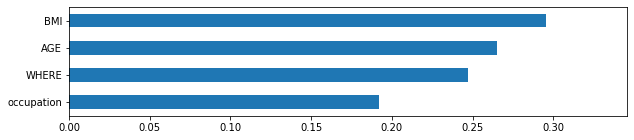

In [14]:
graph_feature_importances( RF_normal_100 , column.columns, summarized_columns = categorical_variables)

In [15]:
RF_normal_100_predict = RF_normal_100.predict(test_feature_ori)

In [16]:
RF_normal_100_predict

array([2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3], dtype=int64)

In [17]:
pd.crosstab( test_y_ori, RF_normal_100_predict, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,2,3
Actual Species,,
1,0,2
2,8,0
3,2,1
4,1,0


In [18]:
RF_normal_100.score(test_feature_ori, test_y_ori)

0.6428571428571429

In [19]:
for i in range(10):
    RF_normal_100 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_depth = None,max_features = None, oob_score = True ) 
    RF_normal_100.fit( train_feature_ori , train_y_ori )
    #graph_feature_importances( RF_normal_100 , column.columns, summarized_columns = categorical_variables)
    RF_normal_100_predict = RF_normal_100.predict(test_feature_ori)
    pd.crosstab( test_y_ori, RF_normal_100_predict, rownames=['Actual Species'], colnames=['Predicted Species'])
    print(RF_normal_100.score(test_feature_ori, test_y_ori))

0.5714285714285714
0.6428571428571429
0.6428571428571429
0.6428571428571429
0.5714285714285714
0.6428571428571429
0.5714285714285714
0.5714285714285714
0.5714285714285714
0.6428571428571429


In [20]:
RF_balanced_100 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_depth = None,
                                         max_features = None, oob_score = True, class_weight = "balanced" ) 

In [21]:
RF_balanced_100.fit( train_feature_ori , train_y_ori )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

WHERE         0.388907
BMI           0.261513
AGE           0.195880
occupation    0.153700
dtype: float64


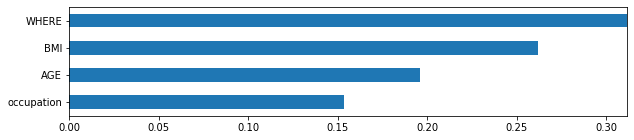

In [22]:
graph_feature_importances( RF_balanced_100 , column.columns, summarized_columns = categorical_variables)

In [23]:
RF_balanced_100_predict = RF_balanced_100.predict(test_feature_ori)

In [24]:
RF_balanced_100_predict

array([2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3], dtype=int64)

In [25]:
pd.crosstab( test_y_ori, RF_balanced_100_predict, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,2,3
Actual Species,,,
1,0,0,2
2,1,7,0
3,0,2,1
4,0,1,0


In [26]:
RF_balanced_100.score(test_feature_ori, test_y_ori)

0.5714285714285714

In [27]:
for i in range(10):
    RF_balanced_100 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_depth = None,
                                         max_features = None, oob_score = True, class_weight = "balanced" )  
    RF_balanced_100.fit( train_feature_ori , train_y_ori )
    #graph_feature_importances( RF_normal_100 , column.columns, summarized_columns = categorical_variables)
    RF_balanced_100_predict = RF_balanced_100.predict(test_feature_ori)
    pd.crosstab( test_y_ori, RF_balanced_100_predict, rownames=['Actual Species'], colnames=['Predicted Species'])
    print(RF_balanced_100.score(test_feature_ori, test_y_ori))

0.5
0.5714285714285714
0.5714285714285714
0.5714285714285714
0.5714285714285714
0.5714285714285714
0.5
0.5
0.5714285714285714
0.5714285714285714


In [28]:
test_array = np.array(test_y_ori)

In [29]:
test_array

array([2, 3, 2, 2, 4, 2, 2, 1, 3, 2, 2, 3, 2, 1], dtype=int64)

In [30]:
random_pain = []
for painsco in range( len(test_array) ):
    random_pain.append( np.random.choice(a = [0,1,2,3,4,5],replace = True, p=[0.05,0.09,0.49,0.32,0.04,0.01]) )
    pain_array = np.array(random_pain)

In [31]:
pain_array

array([0, 3, 3, 1, 1, 2, 2, 2, 0, 2, 2, 3, 3, 3])

In [32]:
random_acc = ( pain_array - test_array )
count_pain = 0 
for iter_array in range( len(random_acc) ):
    if( random_acc[iter_array] == 0 ):
        count_pain = count_pain + 1
real_acc = ( count_pain / len(random_acc) )

In [33]:
real_acc

0.42857142857142855